# Visualization of Flights and Places

In this python notebook, we are going to visualize a set of geographical locations and a set of flights in a map.

The data set for the places is given as a file containing a list of places (specifying city, state, and country). The flight data are given as a csv spreadsheet in which each line contains information on one flight.

### Header

First, we are setting the width of the notebook to 60% width for better readability. We are also loading the modules used in this notebook.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopy # Will be used to convert location names to coordinates
from geopy.geocoders import Nominatim
from mpl_toolkits.basemap import Basemap

%matplotlib inline

### Loading and Preparing Places Data

The places data are contained in the file `places.csv`. There are 84 entries which are formatted as city and country without a comma. For U.S. cities, a two-letter state abbreviation is included as well. We load this file into a `pandas` `DataFrame` named `places_list`.

In [3]:
places_list = pd.read_csv('places.csv', sep='$')
places_list.head()

,City
0,Berlin Germany
1,Washington DC United States
2,New York NY United States
3,Paris France
4,London United Kingdom


In order to be able to draw these places on a map, we need to obtain their geographic coordinates (latitude and longitude). We can use the `geopy` module to look up these coordinates based on the places' name.

In [4]:
geolocator = Nominatim()
geolocator.geocode("Marseille France")

Location(Marseille, Bouches-du-Rhône, Provence-Alpes-Côte d'Azur, France métropolitaine, 13000, France, (43.2961743, 5.3699525, 0.0))

`geopy` returns a `location` object containing a precise name of the city and the corresponding corrdinates. These corrdinates can be accessed with the `latitude` and `longitude` methods. Next, we look up every city in `places_list` and add its coordinates to a new column of the same `DataFrame`, named `Coords`. This column contains tuples of longitude and latitude.

In [5]:
coord_list = []
for city_str in places_list['City']:
    location = geolocator.geocode(city_str, timeout=3)
    coord_list.append((location.latitude, location.longitude))
places_list['Coords'] = coord_list
places_list.head()

,City,Coords
0,Berlin Germany,"(52.5170365, 13.3888599)"
1,Washington DC United States,"(38.8949549, -77.0366456)"
2,New York NY United States,"(40.7306458, -73.9866136)"
3,Paris France,"(48.8566101, 2.3514992)"
4,London United Kingdom,"(51.5073219, -0.1276474)"


### Visualizing Places Data on a Map

We can now add the places to a map. In the following cell, we will create a map using the `basemap` module of `matplotlib`. The map consists of different elements which are created in four steps.

First, we create a map with a polar Lambert azimuthal projection that essentially views Earth from a point above the north pole. Then, the shaded relief data are included. We then loop through the `Coords` column of our `DataFrame` and plot each place as a marker on the map. This requires a conversion from the geographical coordinates to the coordinates of the map figure using `m`. Finally, we add coutry and state boundaries as well as parallels and meridians.

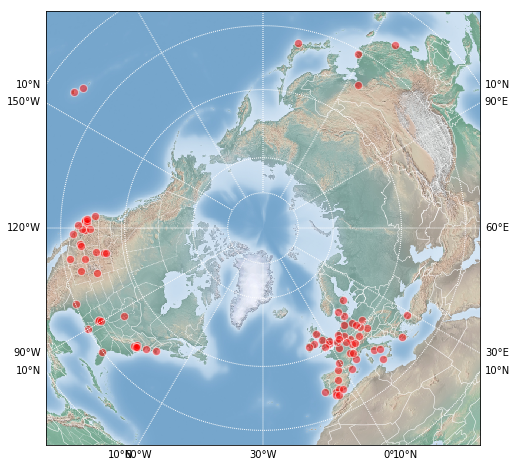

In [6]:
fig = plt.figure(figsize=(8, 8), edgecolor='w')

# Create basemap with polar Lambert azimuthal projection
m = Basemap(projection='nplaea',boundinglat=25,lon_0=-30,resolution='c')

# Add relief to map
m.shadedrelief(scale=0.2)

# Add each place to the map as a red round marker
for place in places_list['Coords']:
    x, y = m(place[1],place[0])
    plt.plot(x, y, 'o', markersize=8, color='red', alpha=0.5,
             markeredgewidth=1, markeredgecolor='white')


# Add country and state borders, parallels, and meridians    
m.drawcountries(color='white')
m.drawstates(color='white', linestyle=':')
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1], color='white');
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1], color='white');

### Loading and Preparing Flight Data

The flight data are given in a csv file names `flights.csv`. We can load it into a `pandas` `DataFrame` with the same name.

In [15]:
flights = pd.read_csv('flights.csv')
flights.columns=['Date','Airline','Type','Time_Dep','Origin','Code_Origin','Flight','Code_Dest','Destination','Time_Arr','PlusOneDay','Aircraft','Booking','MilesProg','Paid','CO2','Comment']
flights[14:16]

,Date,Airline,Type,Time_Dep,Origin,Code_Origin,Flight,Code_Dest,Destination,Time_Arr,PlusOneDay,Aircraft,Booking,MilesProg,Paid,CO2,Comment
14,1/1/00,Virgin America,US,7:00,Washington Dulles,IAD,VX1890,SFO,San Francisco,10:10,NaN,A320,QUAHUA,NaN,NaN,NaN,Return flight
15,1/1/00,Virgin America,US,21:20,San Francisco,SFO,VX456,IAD,Washington Dulles,5:16,1.0,A320,QUAHUA,NaN,NaN,NaN,Overnight outbound flight


As we can see from the two exemplary lines above, each entry contains comprehensive information on every flight. The important information for us is the IATA airport codes in the `Code_Origin` and `Code_Dest` columns, e.g. SFO for San Francisco International Airport.

We will use a data set containing information on over 53,000 airports to obtain the geographical location of each airport based on its IATA code. This data set is stored in `airports.csv` and we will load it into the `airports` `DataFrame`.

In [16]:
airports = pd.read_csv('airports.csv')
airports[ airports['iata_code']=='PHL' ]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
28336,3771,KPHL,large_airport,Philadelphia International Airport,39.871899,-75.241096,36.0,NaN,US,US-PA,Philadelphia,yes,KPHL,PHL,PHL,http://www.phl.org/,http://en.wikipedia.org/wiki/Philadelphia_Inte...,NaN
37977,325027,PHL,closed,Erase Me 19,0.000000,-0.400000,NaN,NaN,US,US-PA,NaN,no,NaN,PHL,NaN,NaN,NaN,NaN


The above lines show the information contained in the airports data set for the Philadelphia airport. The IATA code is stored in `iata_code` (it differes from the designation in `ident`) and we can look up the corresponding coordinates in `latitude_deg` and `longitude_deg`.

We can also see that besides the real Philadelphia airport which is located on the North American continuent at around 39$^\circ$N and 75$^\circ$W, there is a second entry with the IATA code "PHL", but the corrdinates for this entry are located around 0$^\circ$N and 0$^\circ$W, off the coast of Africa.

Since there are several such entries with incorrect coordinates, we need to clean up the data by removing all entries with coordinates located near the origin of the geographic coordinate system:

In [17]:
airports = airports[(abs(airports['latitude_deg'])>1) & (abs(airports['longitude_deg'])>1)]
airports[ airports['iata_code']=='PHL' ]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
28336,3771,KPHL,large_airport,Philadelphia International Airport,39.871899,-75.241096,36.0,NaN,US,US-PA,Philadelphia,yes,KPHL,PHL,PHL,http://www.phl.org/,http://en.wikipedia.org/wiki/Philadelphia_Inte...,NaN


Now, only one, correct entry with Philadelphia'a IATA code "PHL" is left.

We can now merge the `flights` and `airports` data sets. For the sake of clarity, we'll drop all columns from the `flights` `DataFrame` but those containing the airport codes.

In [18]:
flights = flights.loc[2:,['Code_Origin','Code_Dest']].dropna()
flights.head()

,Code_Origin,Code_Dest
2,SEA,SFO
3,HKG,SEA
4,PVG,HKG
5,PEK,SHA
6,SFO,PEK


Next we create a `DataFrame` from the `airports` `DataFrame` which contains only the airport codes and geographic coordinates.

In [19]:
# Take only latitude, longitude, and IATA code from airport DataFrame
airports_reduced = airports[['latitude_deg','longitude_deg','iata_code']]
airports_reduced.loc[29487:29490]

,latitude_deg,longitude_deg,iata_code
29487,41.920799,-71.491402,SFZ
29488,-6.362000,146.710000,KSG
29489,37.245701,-93.388603,SGF
29490,39.840302,-83.840202,SGH


Now, we merge the `flights` and `airport_reduced` data sets. The resulting `DataFrame` named `flights_airports` contains the IATA codes of the origin and destination airports along with the geographic coordinates of both airports.

In [20]:
# Add origin airport coordinates
flights_airports = pd.merge(flights, airports_reduced, 
                   left_on='Code_Origin', right_on='iata_code',
                   how = 'inner').drop('iata_code', axis=1)
flights_airports = flights_airports.rename(columns={
                                 'latitude_deg': 'lat_Origin',
                                 'longitude_deg': 'lon_Origin'})
# Add destination airport coordinates
flights_airports = pd.merge(flights_airports, airports_reduced, 
                   left_on='Code_Dest', right_on='iata_code',
                   how = 'inner').drop('iata_code', axis=1)
flights_airports = flights_airports.rename(columns={
                                 'latitude_deg': 'lat_Dest',
                                 'longitude_deg': 'lon_Dest'})
flights_airports.head()

,Code_Origin,Code_Dest,lat_Origin,lon_Origin,lat_Dest,lon_Dest
0,SEA,SFO,47.449001,-122.308998,37.618999,-122.375
1,CPH,SFO,55.617901,12.656000,37.618999,-122.375
2,ABQ,SFO,35.040199,-106.609001,37.618999,-122.375
3,IAD,SFO,38.944500,-77.455803,37.618999,-122.375
4,IAD,SFO,38.944500,-77.455803,37.618999,-122.375


### Visualizing Flight Data on the same Map

With the data in this form, we can draw the flights as great circles on the map. The below code is the same as above with just the code marked as "NEW CODE" added. We use the `drawgreatcircle` method of `basemap` to draw the flights based on the coordinates of the origin and destination airports.

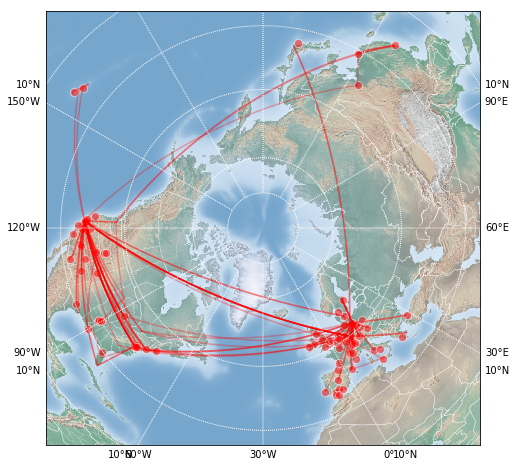

In [21]:
fig = plt.figure(figsize=(8, 8), edgecolor='w')

# Create basemap with polar Lambert azimuthal projection
m = Basemap(projection='nplaea',boundinglat=25,lon_0=-30,resolution='c')

# Add relief to map
m.shadedrelief(scale=0.2)

# Add each place to the map as a red round marker
for place in places_list['Coords']:
    x, y = m(place[1],place[0])
    plt.plot(x, y, 'o', markersize=8, color='red', alpha=0.5,
             markeredgewidth=1, markeredgecolor='white')

# NEW CODE: Add each flight to the map as a red line
for flight in flights_airports.iterrows():
    lo_O = flights_airports.loc[flight[0]]['lon_Origin']
    la_O = flights_airports.loc[flight[0]]['lat_Origin']
    lo_D = flights_airports.loc[flight[0]]['lon_Dest']
    la_D = flights_airports.loc[flight[0]]['lat_Dest']
    m.drawgreatcircle(lo_O,la_O,lo_D,la_D, color='red', alpha = 0.3)
    
# Add country and state borders, parallels, and meridians    
m.drawcountries(color='white')
m.drawstates(color='white', linestyle=':')
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1], color='white');
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1], color='white');